# Principal Component Analysis (Autoencoder)

## Import Libraries

In [1]:
# Import sklearn to create dataset and normalization
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
# create 100 samples with 3 feature divided into 2 catogries 
data = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)

In [4]:
# normalize thr features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [5]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

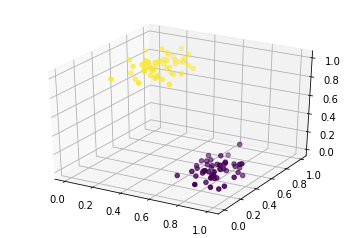

In [6]:
# plot the 3D graph for visualization
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1]);

## Define Network 

In [7]:
# import tensorflow and layer API
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [8]:
num_input  = 3  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_output = 3  # 3 dimensional output (same as input)

In [9]:
# placeholder for x
input_layer = tf.placeholder(tf.float32, shape=[None, num_input])

In [10]:
# fully connected hidden layer with no activation function
hidden_layer = fully_connected(input_layer, num_hidden, activation_fn=None)

In [11]:
# fully connected output layer with no activation function
output_layer = fully_connected(hidden_layer, num_output, activation_fn=None)

## Loss Function

In [12]:
# defining loss function (Mean Squared Error)
loss = tf.reduce_mean(tf.square(output_layer - input_layer))

## Optimizer

In [13]:
# defining learning rate for the optimizer
learning_rate = 0.01

# create optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## Running the Session

In [14]:
num_steps = 1000

# initialize session
with tf.Session() as sess:
    
    # initialize variables
    sess.run(tf.global_variables_initializer())
    
    # train the model
    for i in range(num_steps):
        sess.run(optimizer, feed_dict={input_layer: scaled_data})
   
    # eval hidden layer (2 dimensional output)
    output_ = hidden_layer.eval(feed_dict={input_layer: scaled_data})

## Result

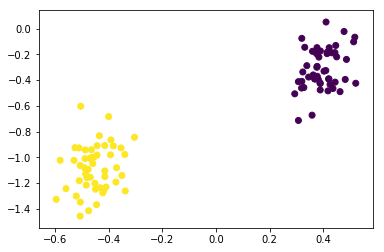

In [15]:
# plot the PCA result
plt.scatter(output_[:,0],output_[:,1],c=data[1]);